In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

symbol = 'QQQ'


In [2]:
results = []
files = sorted([f'{f:>7}' for f in os.listdir(f'data/{symbol}')])
for f in files:
    f = f.strip()
    df = pd.read_csv(f'data/{symbol}/{f}')
    df.start_date = pd.to_datetime(df.start_date)
    df.end_date = pd.to_datetime(df.end_date)
    df['TTL'] = ((df.end_date - df.start_date).dt.days / 7).round(0)
    call_profits = df.call_end_price / df.call_start_price-1
    mean_call_profit = call_profits.mean()
    annual_call_profit = (call_profits / df.TTL * 52).mean()
    positive_ratio = (call_profits > 0).mean()
    call_leverage  = (df.call_strike_price / df.call_start_price).median()
    print(f'[{f:>7}] '
          f'mean profit: {mean_call_profit:+5.0%} '
          f'annual profit: {annual_call_profit:+6.0%} '
          f'positive: {positive_ratio:5.0%} '
          f'leverage: {call_leverage:4.1f} '
          f'daily tx: {df.call_daily_tx.median():4.0f} '
          f'transactions: {len(df):3d} ')
    results.append({
        'profit': annual_call_profit,
        'positive': positive_ratio,
    })

[ 1w.csv] mean profit:  +19% annual profit:  +989% positive:   42% leverage: 91.4 volume:  864 transactions: 102 
[ 2w.csv] mean profit:  +18% annual profit:  +470% positive:   43% leverage: 60.4 volume:  212 transactions: 101 
[ 3w.csv] mean profit:  +25% annual profit:  +429% positive:   44% leverage: 47.1 volume:   95 transactions: 100 
[ 4w.csv] mean profit:  +26% annual profit:  +343% positive:   44% leverage: 40.3 volume:   57 transactions:  98 
[ 5w.csv] mean profit:  +29% annual profit:  +297% positive:   44% leverage: 35.2 volume:   32 transactions:  97 
[ 6w.csv] mean profit:  +29% annual profit:  +250% positive:   51% leverage: 31.3 volume:   23 transactions:  95 
[ 7w.csv] mean profit:  +42% annual profit:  +315% positive:   54% leverage: 28.5 volume:   19 transactions:  56 
[ 8w.csv] mean profit:  +14% annual profit:   +93% positive:   44% leverage: 25.7 volume:   30 transactions:  27 
[ 9w.csv] mean profit:  +38% annual profit:  +218% positive:   54% leverage: 24.7 volume

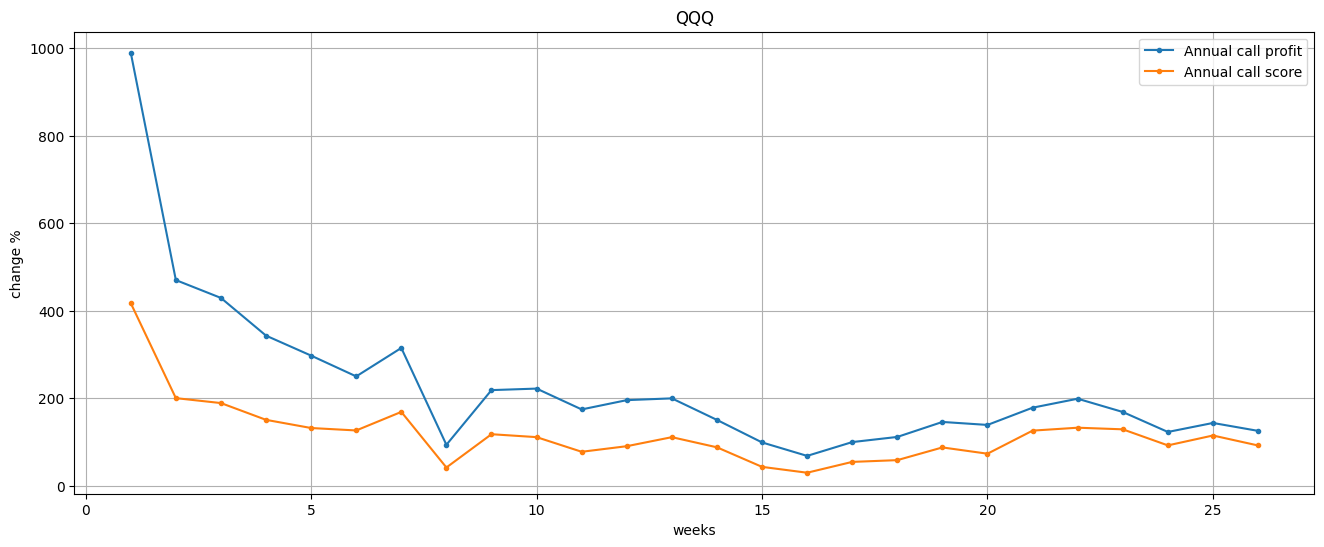

In [3]:
plt.figure(figsize=(16,6))
plt.plot([None]+[r['profit'] * 100 for r in results], label='Annual call profit', marker='.')
plt.plot([None]+[r['profit'] * r['positive'] * 100 for r in results], label='Annual call score', marker='.')
plt.legend(loc='best')
plt.title(symbol)
plt.xlabel('weeks')
plt.ylabel('change %')
plt.grid()
plt.show()